# Data Visualization

### Mounting Google drive and unzipping the dataset

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount drive
drive.mount('/content/drive')

# Path to your dataset zip in Drive
zip_path = "/content/drive/MyDrive/regression_image_dataset.zip"

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/regression_image_dataset")

# Paths
image_dir = "/content/regression_image_dataset/images"
labels_path = "/content/regression_image_dataset/labels.csv"

Mounted at /content/drive


### Loading Labels

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load labels.csv
df = pd.read_csv(labels_path)

print(df.head())

                    filename  label
0  1.5_IMG20250325162854.jpg    1.5
1    1.5_20250408_180043.jpg    1.5
2  1.5_IMG20250111144616.jpg    1.5
3    1.5_20250327_154322.jpg    1.5
4  1.5_IMG20250111144601.jpg    1.5


### Extracting Mean RGB features

In [ ]:
mean_r, mean_g, mean_b = [], [], []

for fname in df['filename']:
    img_path = os.path.join(image_dir, fname)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB

    # Compute mean of each channel
    mean_r.append(np.mean(img[:,:,0]))
    mean_g.append(np.mean(img[:,:,1]))
    mean_b.append(np.mean(img[:,:,2]))

# Add features to dataframe
df['mean_R'] = mean_r
df['mean_G'] = mean_g
df['mean_B'] = mean_b

print(df.head())


                    filename  label      mean_R      mean_G      mean_B
0  1.5_IMG20250325162854.jpg    1.5  155.696199  151.844554  145.289723
1    1.5_20250408_180043.jpg    1.5  167.540187  163.090704  160.961933
2  1.5_IMG20250111144616.jpg    1.5   67.636925   65.914216   60.612489
3    1.5_20250327_154322.jpg    1.5  171.111495  169.335668  169.975261
4  1.5_IMG20250111144601.jpg    1.5   82.274354   78.956600   79.570925


In [ ]:
df.to_csv("mean_rgb_values.csv", index=False)
print("✅ Mean RGB values saved to mean_rgb_values.csv")
print(df.head())

✅ Mean RGB values saved to mean_rgb_values.csv
                    filename  label      mean_R      mean_G      mean_B
0  1.5_IMG20250325162854.jpg    1.5  155.696199  151.844554  145.289723
1    1.5_20250408_180043.jpg    1.5  167.540187  163.090704  160.961933
2  1.5_IMG20250111144616.jpg    1.5   67.636925   65.914216   60.612489
3    1.5_20250327_154322.jpg    1.5  171.111495  169.335668  169.975261
4  1.5_IMG20250111144601.jpg    1.5   82.274354   78.956600   79.570925


### Violin plots for RBG vs pH

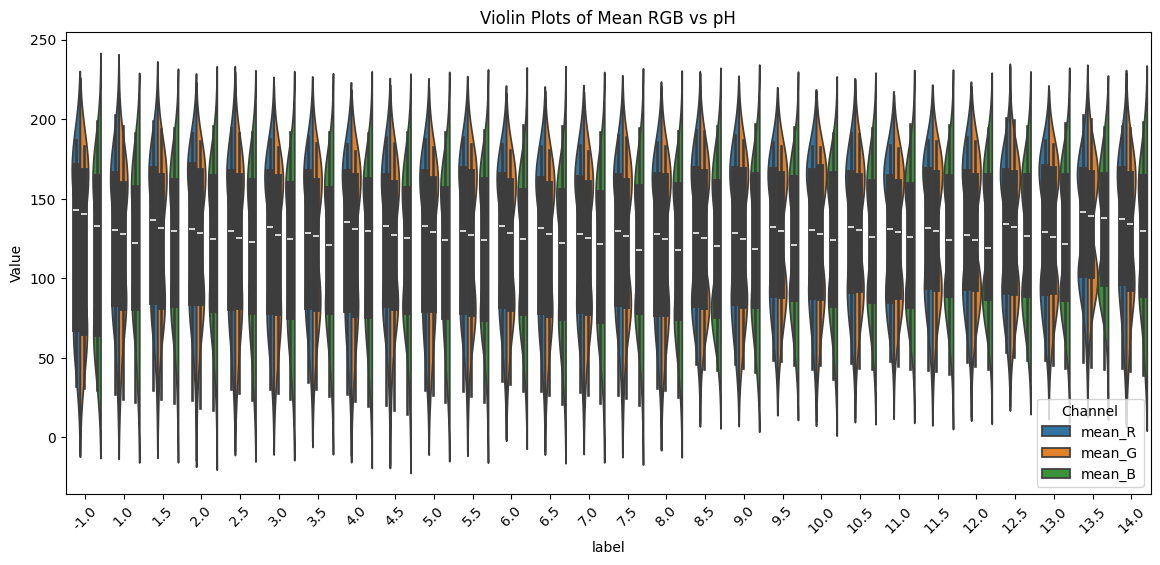

In [ ]:
plt.figure(figsize=(14,6))
df_melted = df.melt(id_vars=['label'], value_vars=['mean_R','mean_G','mean_B'], var_name='Channel', value_name='Value')
sns.violinplot(x="label", y="Value", hue="Channel", data=df_melted, split=True)
plt.xticks(rotation=45)
plt.title("Violin Plots of Mean RGB vs pH")

plt.savefig("violin_plot.png", dpi=600, bbox_inches='tight', format='png')
plt.show()

### Scatter plots of mean RGB vs pH

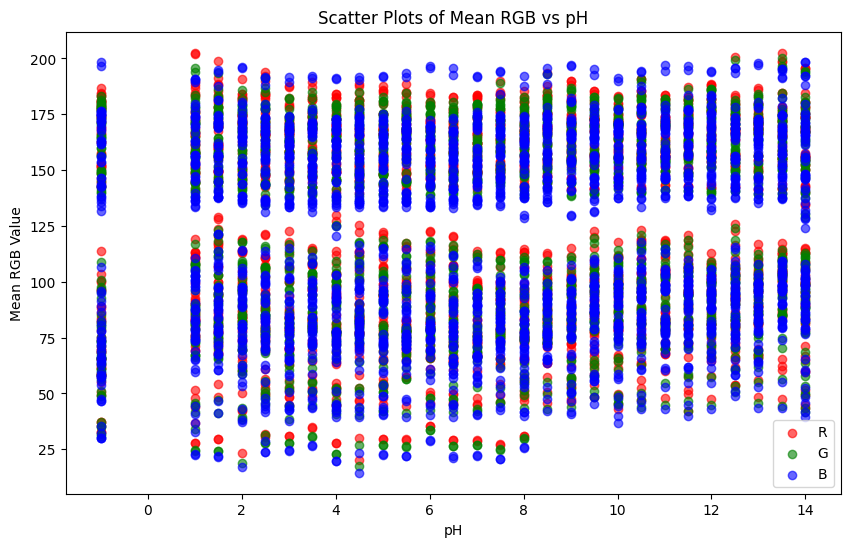

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['label'], df['mean_R'], color='r', alpha=0.6, label='R')
plt.scatter(df['label'], df['mean_G'], color='g', alpha=0.6, label='G')
plt.scatter(df['label'], df['mean_B'], color='b', alpha=0.6, label='B')
plt.xlabel("pH")
plt.ylabel("Mean RGB Value")
plt.legend()
plt.title("Scatter Plots of Mean RGB vs pH")
plt.savefig("scatter_plot.png", dpi=600, bbox_inches='tight', format='png')
plt.show()

### Correlation heatmap

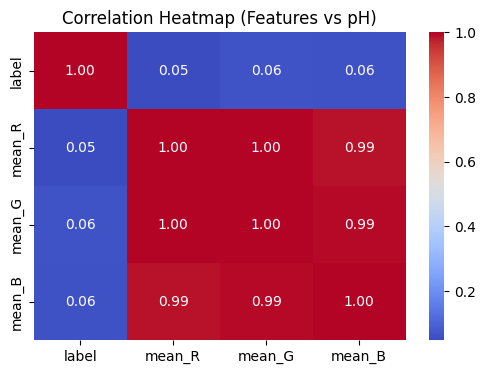

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['label','mean_R','mean_G','mean_B']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Features vs pH)")
plt.savefig("correlation_heatmap.png", dpi=600, bbox_inches='tight', format='png')
plt.show()

### PCA Scatter plot for class separation

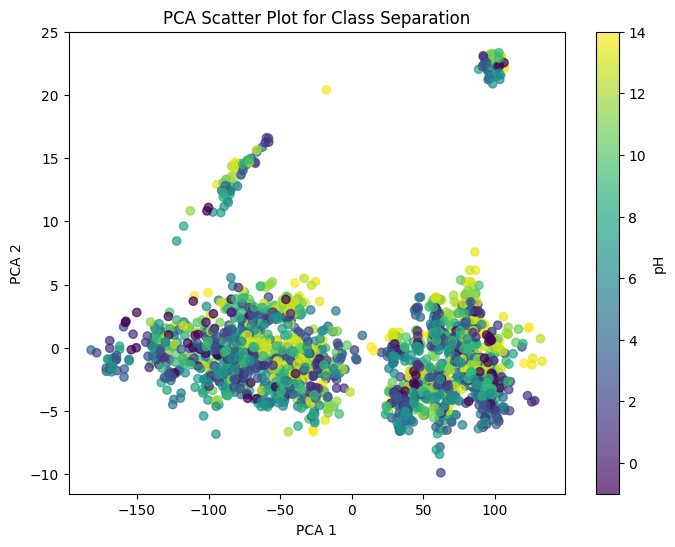

In [ ]:
from sklearn.decomposition import PCA

# Features for PCA
X = df[['mean_R','mean_G','mean_B']].values
y = df['label'].values

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="pH")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Scatter Plot for Class Separation")
plt.savefig("pca_plot.png", dpi=600, bbox_inches='tight', format='png')
plt.show()